## The Data

In [1]:
# AutoEncoders on Image Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

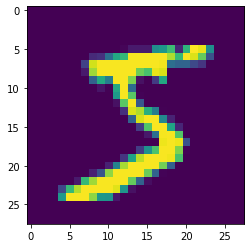

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [8]:
783/2

391.5

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [10]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [11]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [12]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2518 - accuracy: 0.7911 - val_loss: 0.2118 - val_accuracy: 0.7936
Epoch 2/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1977 - accuracy: 0.7962 - val_loss: 0.1764 - val_accuracy: 0.7976
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1664 - accuracy: 0.8011 - val_loss: 0.1547 - val_accuracy: 0.8025
Epoch 4/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1518 - accuracy: 0.8033 - val_loss: 0.1440 - val_accuracy: 0.8031
Epoch 5/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1436 - accuracy: 0.8049 - val_loss: 0.1385 - val_accuracy: 0.8045


In [13]:
passed_images = autoencoder.predict(X_test[:10])

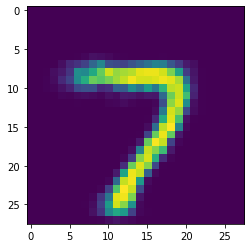

In [14]:
plt.imshow(passed_images[0])

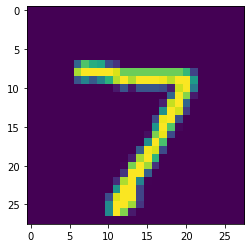

In [15]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [16]:
from tensorflow.keras.layers import GaussianNoise

In [17]:
sample = GaussianNoise(0.2)

In [18]:
noisey = sample(X_test[0:2],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



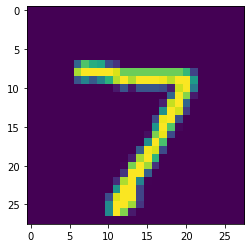

In [19]:
plt.imshow(X_test[0])

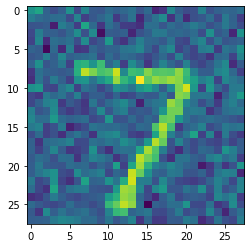

In [20]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [21]:
import tensorflow as tf
import numpy as np

In [22]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [23]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [24]:
noise_remover = Sequential([encoder, decoder])

In [25]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [26]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 11s 176us/sample - loss: 0.1701 - accuracy: 0.8012 - val_loss: 0.1314 - val_accuracy: 0.8065
Epoch 2/8
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1291 - accuracy: 0.8081 - val_loss: 0.1199 - val_accuracy: 0.8082
Epoch 3/8
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1198 - accuracy: 0.8098 - val_loss: 0.1127 - val_accuracy: 0.8098
Epoch 4/8
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1153 - accuracy: 0.8105 - val_loss: 0.1101 - val_accuracy: 0.8103
Epoch 5/8
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1126 - accuracy: 0.8109 - val_loss: 0.1073 - val_accuracy: 0.8108
Epoch 6/8
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1104 - accuracy: 0.8113 - val_loss: 0.1059 - val_accuracy: 0.8108
Epoch 7/8
60000/60000 [===========================

In [27]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


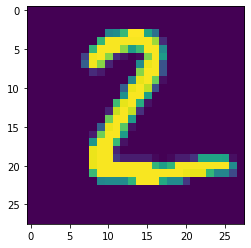

The Noisey Version


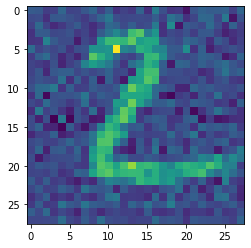

After going through denoiser


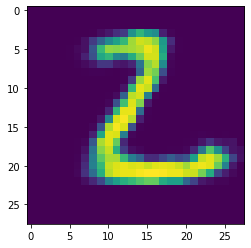

In [28]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()